### JOBarcelona ’22 | Data Science

**Roadmap**

Antes de lanzarnos de lleno a la programación, deberíamos trazar una breve guía para mantenernos en el camino. Los siguientes pasos constituyen la base de cualquier flujo de trabajo de aprendizaje automático una vez que tenemos un problema y un modelo en mente:

* 1) Plantear la pregunta y determinar los datos necesarios
* 2) Adquirir los datos en un formato accesible
* 3) Identificar y corregir los puntos de datos/anomalías que faltan, según sea necesario
* 4) Preparar los datos para el modelo de aprendizaje automático
* 5) Establecer un punto de referencia que se pretende superar (en el caso de clasificación sería obtener un alto nivel de presición)
* 6) Entrenar el modelo con los datos de entrenamiento
* 7) Hacer predicciones con los datos de prueba
* 8) Comparar las predicciones con los objetivos conocidos del conjunto de pruebas y calcular las métricas de rendimiento
* 9) Si el rendimiento no es satisfactorio, ajustar el modelo, adquiera más datos o pruebe otra técnica de modelización.
* 10) Interpretar el modelo y comunicar los resultados de forma visual y numérica

Data Set

* Hour: Hora a la que se ha hecho la medición.
* Minutes: Minutos en los que se ha realizado la medición.
* Sensor_alpha: Posición del insecto al sensor alpha.
* Sensor_beta: Posición del insecto al sensor beta.
* Sensor_gamma: Posición del insecto al sensor gamma.
* Sensor_alpha_plus: Posición del insecto al sensor alpha+.
* Sensor_beta_plus: Posición del insecto al sensor beta+.
* Sensor_gamma_plus: Posición del insecto al sensor gamma+.

**Insect: Categoría de insecto.**
* 0 -> Lepidoptero
* 1 -> Himenoptera
* 2 -> Diptera

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../Practice/2-JOBarcelona '22/Data Sets/train.csv")

✅ **Task 1** → Análisis exploratorio

1) Leemos data frame, verificamos con head y tail el inicio y final del dataframe y el formato con shape.

In [3]:
df.head()

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


In [4]:
df.tail()

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
6996,6996,21,0,6.576106,301.050638,146.682819,-209.480741,-129.776336,-51.226256,1
6997,6997,18,57,-6.169382,-317.652257,-161.644320,248.055724,-112.626344,99.463913,0
6998,6998,22,47,-7.289684,-406.732525,-212.097250,248.745127,116.893077,32.806150,0
6999,6999,18,14,-92.317105,-191.555040,88.371271,38.728565,-39.050466,20.356711,0
7000,7000,21,31,-72.083585,-11.434977,-52.961743,-72.696385,145.299227,-143.856243,1


In [5]:
df.shape

(7001, 10)

(array([3519.,    0.,    0.,    0.,    0., 2793.,    0.,    0.,    0.,
         689.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

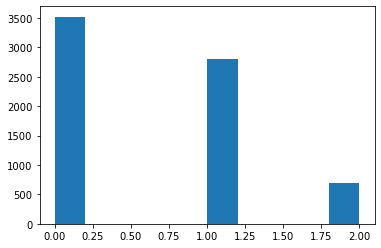

In [6]:
plt.hist(df.Insect)

Se observa cómo la gran mayoría son Lepidópteros, luego Himenoptera y finalmente, lo que menos tenemos es Diptera.

In [7]:
df.Insect.unique()

array([2, 0, 1], dtype=int64)

### Identificar las anomalías/los datos que faltan

In [8]:
print('El tamaño del dataset es:', df.shape)

El tamaño del dataset es: (7001, 10)


In [9]:
df.describe()

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
count,7001.00000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000
mean,3500.00000,19.598914,29.405942,0.477171,-29.974117,-5.624690,7.188060,-0.757901,-0.554533,0.595772
std,2021.15895,3.507008,17.375830,99.294856,133.095125,115.871391,122.327980,100.039477,100.535951,0.661604
min,0.00000,1.000000,0.000000,-404.898823,-656.272666,-448.478039,-437.205393,-387.567443,-374.961689,0.000000
25%,1750.00000,19.000000,14.000000,-68.573905,-116.060383,-83.508747,-79.496687,-68.061596,-69.652647,0.000000
50%,3500.00000,21.000000,29.000000,-0.287447,-36.171567,-1.217606,-1.133567,-0.444124,0.027128,0.000000
75%,5250.00000,21.000000,44.000000,66.480795,56.637778,76.870277,93.285286,66.181909,67.838524,1.000000
max,7000.00000,23.000000,59.000000,351.256221,518.395878,378.349287,462.556319,345.279240,363.682391,2.000000


No hay puntos de datos que aparezcan inmediatamente como anómalos y no hay ceros en ninguna de las columnas de medición. Y otro hecho importante es que no hay ninguna variable categórica, por lo que, no hay necesidad de hacer ningún conjunto de datos dummie.

## Random Forest Classification

In [10]:
df = df.rename(columns={'Unnamed: 0': 'Indices'}) 

In [11]:
df.head()

,Indices,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


In [12]:
colnames = df.columns.values.tolist()

In [13]:
predictors=colnames[1:8]
target=colnames[9]

In [14]:
#Dividir el conjunto de datos en partes de entrenamiento y de prueba de forma aleatoria.
#Utilizamos el método de numpy random.uniform, para seleccionar aleatoriamente estos conjuntos.
#Generaremos una columna auxiliar en el dataset,  con el 80% true y el 20% false, (entrenamiento y testing)
df["is_train"] = np.random.uniform(0,1,len(df))<0.8
train, test = df[df["is_train"]==True], df[df["is_train"]==False]

In [15]:
def RandomForestClassifier(rang, jump):
    from sklearn.ensemble import RandomForestClassifier
    score=[]
    for i in range (100, rang, jump):
        forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=i, random_state=i, criterion="entropy")
        forest.fit(train[predictors],train[target])
        print ("El bosque de clasificación aleatorio con ", i, " arboles, tiene un un Score de: %0.3f" %forest.oob_score_)
        score.append(np.round(forest.oob_score_,3))
    plt.plot(range(100,rang,jump), score, "ro-")
    plt.xlabel("N° árboles en bosque")
    plt.ylabel("Score obtenido")
    plt.title("Score respeco a árboles")
    plt.figure(figsize=(8,4))
    plt.show()
    print ("El promedio de presición obtenido es %0.3f" %np.mean(score))
    return(forest)

El bosque de clasificación aleatorio con  100  arboles, tiene un un Score de: 0.888
El bosque de clasificación aleatorio con  200  arboles, tiene un un Score de: 0.891
El bosque de clasificación aleatorio con  300  arboles, tiene un un Score de: 0.888
El bosque de clasificación aleatorio con  400  arboles, tiene un un Score de: 0.889
El bosque de clasificación aleatorio con  500  arboles, tiene un un Score de: 0.890


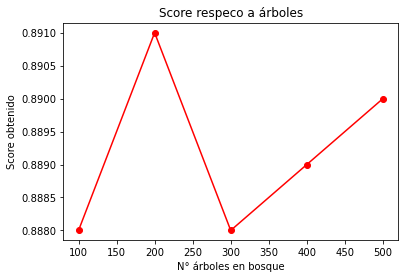

<Figure size 576x288 with 0 Axes>

El promedio de presición obtenido es 0.889


In [76]:
forest = RandomForestClassifier(600, 100) #(Límite máximo de árboles y cantidad que añadirá por iteración)

In [78]:
preds = forest.predict(test[predictors])
unique, counts = np.unique(preds, return_counts=True)
dict(zip(unique, counts))

{0: 745, 1: 595, 2: 86}

In [29]:
crosstab = pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])
crosstab

Predictions,0,1,2
Actual,,,
0,673,53,4
1,30,525,3
2,44,21,68


### Testing otras formas

In [17]:
from sklearn import svm

### Linear SVC----------

In [ ]:
classifier = svm.SVC(kernel="linear", C=1.0)
classifier.fit(train[predictors], train[target])

In [ ]:
preds = classifier.predict(test[predictors])
unique, counts = np.unique(preds, return_counts=True)
dict(zip(unique, counts))

In [ ]:
crosstab = pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])
crosstab

In [26]:
test["predictions"]=preds

C:\Users\Kevin\AppData\Local\Temp/ipykernel_14896/1997534870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predictions"]=preds


In [27]:
test

,Indices,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect,is_train,predictions
1,1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0,False,0
7,7,7,34,-103.673329,-234.696711,-103.499400,98.081187,-28.156253,45.068583,0,False,0
11,11,21,54,-206.589303,-158.165606,90.269891,25.266184,-15.321192,-134.624308,0,False,1
21,21,20,46,29.681302,-27.605620,-23.742086,-13.384727,101.086015,79.030902,0,False,0
22,22,7,19,-35.407064,127.249181,-42.350047,-61.187870,85.065680,11.662521,2,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6976,6976,20,45,72.579255,-46.628856,-141.336192,75.120362,-88.818773,37.450551,0,False,0
6978,6978,7,28,11.537955,421.221901,172.875838,-256.915111,10.907308,33.833846,1,False,1
6979,6979,20,4,54.939728,-1.452499,-75.903302,-92.174846,-159.847035,104.391730,2,False,1
6981,6981,21,58,59.903584,168.636496,60.961200,-131.062331,-74.341512,-21.405702,1,False,1


### Sigmoid SVC----------

In [33]:
classifier = svm.SVC(kernel="sigmoid", C=10.0)
classifier.fit(train[predictors], train[target])

SVC(C=10.0, kernel='sigmoid')

In [34]:
preds = classifier.predict(test[predictors])
unique, counts = np.unique(preds, return_counts=True)
dict(zip(unique, counts))

{0: 794, 1: 601, 2: 31}

In [35]:
crosstab = pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])
crosstab

Predictions,0,1,2
Actual,,,
0,467,235,3
1,242,299,28
2,85,67,0


### Polinomial SVC----------

In [27]:
classifier = svm.SVC(kernel="poly", C=1000.0)
classifier.fit(train[predictors], train[target])

SVC(C=1000.0, kernel='poly')

In [28]:
preds = classifier.predict(test[predictors])
unique, counts = np.unique(preds, return_counts=True)
dict(zip(unique, counts))

{0: 715, 1: 619, 2: 92}

In [29]:
crosstab = pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])
crosstab

Predictions,0,1,2
Actual,,,
0,586,112,7
1,84,484,1
2,45,23,84


### RBF SVC----------

In [42]:
classifier = svm.SVC(kernel="rbf", C=10000)
classifier.fit(train[predictors], train[target])

SVC(C=10000)

In [43]:
preds = classifier.predict(test[predictors])
unique, counts = np.unique(preds, return_counts=True)
dict(zip(unique, counts))

{0: 693, 1: 600, 2: 133}

In [44]:
crosstab = pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])
crosstab

Predictions,0,1,2
Actual,,,
0,579,94,32
1,70,495,4
2,44,11,97


In [45]:
test["predictions"]=preds

C:\Users\Kevin\AppData\Local\Temp/ipykernel_10368/1997534870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predictions"]=preds


In [46]:
test

,Indices,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect,is_train,predictions
1,1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0,False,0
10,10,21,19,257.203234,104.388884,117.474568,-76.468655,-139.068103,-69.410840,1,False,1
15,15,23,24,-22.679284,150.699956,-208.015827,214.097978,16.832217,-140.142575,2,False,2
17,17,21,51,-149.061702,-45.717649,-108.855455,-83.075828,-30.577092,33.207196,1,False,0
20,20,21,29,40.869523,-164.872491,88.571757,-138.647033,68.742976,-75.222573,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6979,6979,20,4,54.939728,-1.452499,-75.903302,-92.174846,-159.847035,104.391730,2,False,0
6984,6984,21,10,32.370937,-336.444212,-250.876343,165.152871,-154.039602,18.498736,0,False,0
6988,6988,19,54,66.287942,44.297398,-40.591987,37.113752,144.368202,88.723283,0,False,2
6996,6996,21,0,6.576106,301.050638,146.682819,-209.480741,-129.776336,-51.226256,1,False,1


(array([705.,   0.,   0.,   0.,   0., 569.,   0.,   0.,   0., 152.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

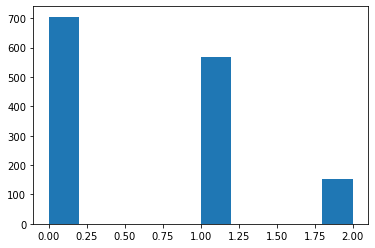

In [51]:
plt.hist(test.Insect)

(array([693.,   0.,   0.,   0.,   0., 600.,   0.,   0.,   0., 133.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

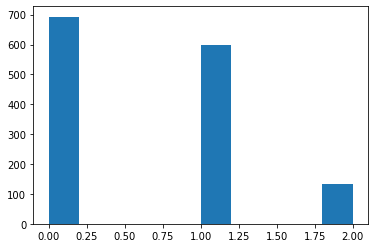

In [53]:
plt.hist(test.predictions)

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import KFold

In [58]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [59]:
scores = cross_val_score(classifier, train[predictors], train[target], scoring="accuracy", cv=cv, n_jobs=1)
scores

array([0.8046595 , 0.78494624, 0.82795699, 0.80824373, 0.83691756,
       0.82405745, 0.80610413, 0.82944345, 0.82405745, 0.81687612])

In [62]:
score = np.mean(scores)
score

0.8163262613977851

In [63]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(test[target], preds))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       705
           1       0.91      0.95      0.93       569
           2       0.95      0.54      0.69       152

    accuracy                           0.90      1426
   macro avg       0.92      0.81      0.84      1426
weighted avg       0.90      0.90      0.89      1426



In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

In [82]:
mat = confusion_matrix(test[target], preds)
mat

array([[659,  43,   3],
       [ 26, 542,   1],
       [ 60,  10,  82]], dtype=int64)

<AxesSubplot:>

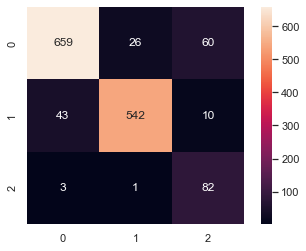

In [84]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)